In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ames-dataset/AmesHousing.csv
/kaggle/input/ames-housing-dataset/AmesHousing.csv
/kaggle/input/housing/train.csv
/kaggle/input/housing/test.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/housing/train.csv')
test_df = pd.read_csv('/kaggle/input/housing/test.csv')

train_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
missing_cols = train_df.columns[train_df.isnull().any()]
print(missing_cols.tolist())


['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


<Axes: >

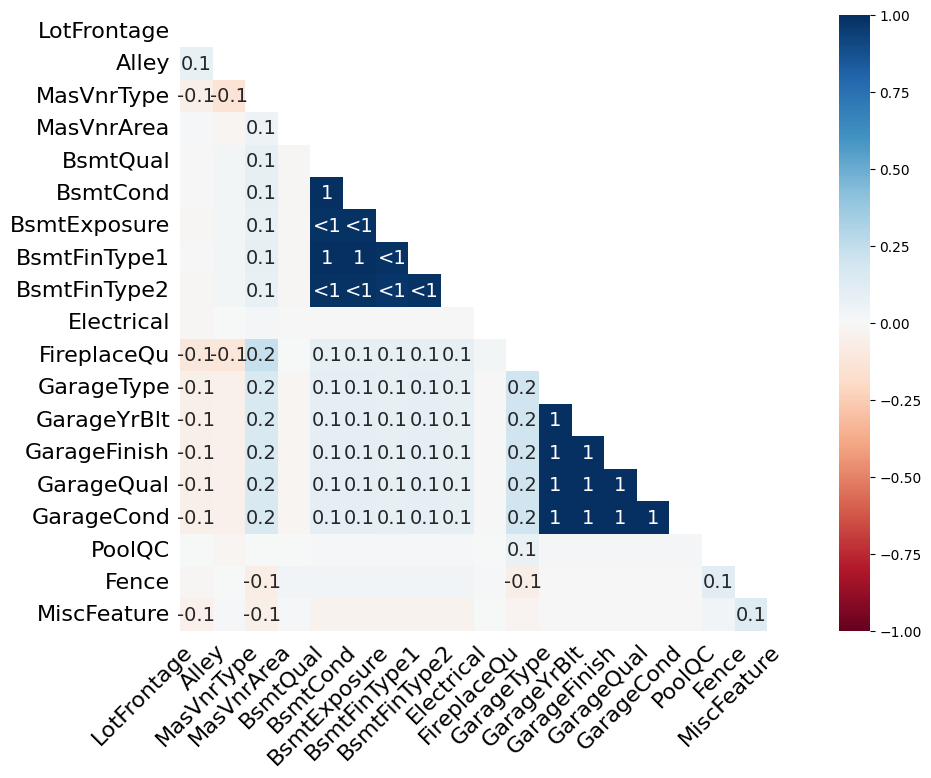

In [4]:
import pandas as pd
import missingno as msno
msno.heatmap(train_df,figsize=(10,8))

In [5]:
import pandas as pd

# Example: Load your dataset
#df = train_df
df=train_df

# 🚧 Garage-related features (strongly correlated in missingness)
garage_features = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

# Fill missing with 'None' or 'NoGarage' depending on logic
for col in garage_features:
    df[col] = df[col].fillna('NoGarage')

# 🚧 Basement-related features
basement_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

for col in basement_features:
    df[col] = df[col].fillna('NoBasement')

# 🚧 Fireplace (single feature but high missing rate)
df['FireplaceQu'] = df['FireplaceQu'].fillna('NoFireplace')

# 🚧 Masonry veneer (MasVnr) group
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

# 🚧 Pool, Fence, Alley, Misc
df['PoolQC'] = df['PoolQC'].fillna('NoPool')
df['Fence'] = df['Fence'].fillna('NoFence')
df['Alley'] = df['Alley'].fillna('NoAlley')
df['MiscFeature'] = df['MiscFeature'].fillna('None')

# ✅ Optional: Confirm that none of these groups have missing values now
print(df[garage_features + basement_features + ['FireplaceQu', 'MasVnrType', 'MasVnrArea', 
                                                'PoolQC', 'Fence', 'Alley', 'MiscFeature']].isnull().sum())


GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
MasVnrType      0
MasVnrArea      0
PoolQC          0
Fence           0
Alley           0
MiscFeature     0
dtype: int64


In [6]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
missing_cat = [col for col in cat_cols if df[col].isnull().sum() > 0]
print(missing_cat)


['Electrical']


In [7]:
for col in missing_cat:
    df[col] = df[col].fillna('Missing')


In [8]:
df.isnull().sum().sort_values(ascending=False).head(15)

LotFrontage     259
GarageYrBlt      81
GarageType        0
FireplaceQu       0
Fireplaces        0
Functional        0
TotRmsAbvGrd      0
KitchenQual       0
KitchenAbvGr      0
BedroomAbvGr      0
SalePrice         0
FullBath          0
BsmtHalfBath      0
BsmtFullBath      0
GrLivArea         0
dtype: int64

In [9]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt'])


In [10]:
df.isnull().sum().sort_values(ascending=False).head(15)

SalePrice        0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
dtype: int64

In [11]:
def encode_features(df):
    """
    Encodes categorical variables:
    - Applies ordinal mapping to quality-related features
    - Applies one-hot encoding to nominal categorical features
    """
    # 1. Ordinal features with logical ranks
    quality_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
    ordinal_cols = [
        'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond',
        'Heating QC', 'Kitchen Qual', 'Fireplace Qu',
        'Garage Qual', 'Garage Cond', 'Pool QC'
    ]
    for col in ordinal_cols:
        if col in df.columns:
            df[col] = df[col].map(quality_map)

    # 2. One-hot encoding for nominal features
    nominal_cols = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'KitchenQual', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'MiscFeature', 'SaleType', 'SaleCondition','Street', 'Alley', 'Utilities', 'Neighborhood', 'Foundation', 'Heating',
       'Electrical', 'Functional', 'Fence']
    df = pd.get_dummies(df, columns=[col for col in nominal_cols if col in df.columns], drop_first=True)

    return df

In [12]:
df = encode_features(df)

In [13]:
print(df.select_dtypes(include='object').columns)  # Should be empty
print(df.isnull().sum().sum()) 

Index([], dtype='object')
0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


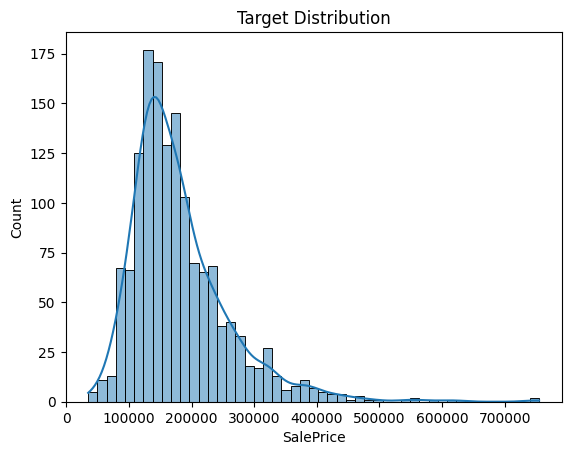

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['SalePrice'], kde=True)
plt.title('Target Distribution')
plt.show()


In [15]:
# Identify outliers
from scipy import stats

z_scores = np.abs(stats.zscore(df['SalePrice']))
df_no_outliers = df[z_scores < 3]  # keep only within 3 standard deviations

# Optionally winsorize extreme ends
from scipy.stats.mstats import winsorize
df['SalePrice_win'] = winsorize(df['SalePrice'], limits=[0.01, 0.01])


In [16]:
# Try median instead of mean
df.fillna(df.median(numeric_only=True), inplace=True)


In [17]:
df['GrLivArea_sq'] = df['GrLivArea'] ** 2
df['Log_LotArea'] = np.log1p(df['LotArea'])
df['OverallQual_Binary'] = (df['OverallQual'] >= 7).astype(int)  # hard threshold


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import xgboost as xgb

# ========== 1. Feature Engineering ==========
df['Qual_x_GrLivArea'] = df['OverallQual'] * df['GrLivArea']
df['Qual_x_GarageCars'] = df['OverallQual'] * df['GarageCars']
df['Qual_x_BsmtFinSF1'] = df['OverallQual'] * df['BsmtFinSF1']
df['LargeHome_LowQual'] = ((df['GrLivArea'] > 1800) & (df['OverallQual'] <= 5)).astype(int)
df['HighGarage_HighQual'] = ((df['GarageCars'] >= 3) & (df['OverallQual'] >= 8)).astype(int)
df['BigBasement_HighQual'] = ((df['TotalBsmtSF'] > 1000) & (df['OverallQual'] >= 7)).astype(int)
df['BsmtScore'] = df['BsmtFinSF1'] * (df['OverallQual'] / 10)
df['TotalFinishedSqft'] = df['GrLivArea'] + df['BsmtFinSF1']
df['AgeAtSale'] = df['YrSold'] - df['YearBuilt']
df['GarageQualBoost'] = df['GarageArea'] * (df['OverallQual'] / 10)

# ========== 2. Target Transformation ==========
df['SalePrice_log'] = np.log1p(df['SalePrice'])

# ========== 3. Setup Features and Target ==========
target = 'SalePrice_log'
new_feats = [
    'Qual_x_GrLivArea', 'Qual_x_GarageCars', 'Qual_x_BsmtFinSF1',
    'LargeHome_LowQual', 'HighGarage_HighQual', 'BigBasement_HighQual',
    'BsmtScore', 'TotalFinishedSqft', 'AgeAtSale', 'GarageQualBoost'
]

X = df.drop(columns=['SalePrice', 'SalePrice_log'], errors='ignore').copy()
X[new_feats] = df[new_feats]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ========== 4. Define and Benchmark Models ==========
def rmse_log(y_true_log, y_pred_log):
    return mean_squared_error(np.expm1(y_true_log), np.expm1(y_pred_log), squared=False)

models = {
    'Ridge': make_pipeline(StandardScaler(), Ridge(alpha=10)),
    'Lasso': make_pipeline(StandardScaler(), Lasso(alpha=0.1)),
    'BayesianRidge': make_pipeline(StandardScaler(), BayesianRidge()),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42),
    'LightGBM': lgb.LGBMRegressor(random_state=42)
}

print("📊 RMSE (original SalePrice units) across models:")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = rmse_log(y_test, y_pred)
    print(f"{name:<14}: {score:.2f}")


📊 RMSE (original SalePrice units) across models:
Ridge         : 20339.28
Lasso         : 29871.48
BayesianRidge : 20935.92
RandomForest  : 13732.69
XGBoost       : 16221.05
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5600
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 184
[LightGBM] [Info] Start training from score 12.030658
LightGBM      : 16802.34


In [19]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

# Use your processed X and y (with engineered features and log-transformed target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42))
]

# Ridge as meta-learner
stacked_model = StackingRegressor(
    estimators=base_models,
    final_estimator=make_pipeline(StandardScaler(), Ridge(alpha=8.29)),  # use tuned alpha here
    passthrough=True,
    cv=5
)

# Fit and evaluate
stacked_model.fit(X_train, y_train)
y_pred = stacked_model.predict(X_test)

# Evaluate on original SalePrice scale
rmse_stacked = mean_squared_error(np.expm1(y_test), np.expm1(y_pred), squared=False)
print(f"📦 Stacked Model RMSE (Ridge meta): {rmse_stacked:.2f}")


📦 Stacked Model RMSE (Ridge meta): 14346.51


In [20]:
# Fit RF to get importances
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Select top N features
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_feats = importances.sort_values(ascending=False).head(100).index.tolist()

# Reduce X
X_train_reduced = X_train[top_feats]
X_test_reduced = X_test[top_feats]


In [21]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
import xgboost as xgb
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# === Split full feature space ===
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Fit base models to get top features ===
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_full, y_train)

xgb_model = xgb.XGBRegressor(n_estimators=200, random_state=42)
xgb_model.fit(X_train_full, y_train)

rf_top = pd.Series(rf.feature_importances_, index=X.columns).nlargest(60).index
xgb_top = pd.Series(xgb_model.feature_importances_, index=X.columns).nlargest(60).index

core_features = list(set(rf_top) & set(xgb_top))  # intersection of importance

# === Reduce datasets ===
X_core = X[core_features]
X_train, X_test, y_train, y_test = train_test_split(X_core, y, test_size=0.2, random_state=42)

# === Stack Models ===
base_models = [
    ('rf', RandomForestRegressor(n_estimators=200, max_depth=12, random_state=42)),
    ('xgb', xgb.XGBRegressor(n_estimators=200, learning_rate=0.03, max_depth=4, subsample=0.8, random_state=42))
]

stacked_model = StackingRegressor(
    estimators=base_models,
    final_estimator=make_pipeline(StandardScaler(), Ridge(alpha=8.29)),
    passthrough=True,
    cv=5
)

# === Train stack + base RF separately ===
stacked_model.fit(X_train, y_train)
rf_final = RandomForestRegressor(n_estimators=200, random_state=42)
rf_final.fit(X_train, y_train)

# === Predict ===
y_pred_stack = stacked_model.predict(X_test)
y_pred_rf = rf_final.predict(X_test)

# === Blend optimizer ===
def blend_rmse(w):
    blend = w * np.expm1(y_pred_rf) + (1 - w) * np.expm1(y_pred_stack)
    return mean_squared_error(np.expm1(y_test), blend, squared=False)

res = minimize(blend_rmse, x0=[0.5], bounds=[(0, 1)])
w_opt = res.x[0]
y_blend = w_opt * np.expm1(y_pred_rf) + (1 - w_opt) * np.expm1(y_pred_stack)

print(f"🔧 Optimal RF weight: {w_opt:.3f}")
print(f"🎯 Final Blended RMSE: {mean_squared_error(np.expm1(y_test), y_blend, squared=False):.2f}")


🔧 Optimal RF weight: 0.000
🎯 Final Blended RMSE: 12817.36


In [22]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# === Step 1: Get predictions and residuals on training set
stacked_model.fit(X_train, y_train)
y_pred_train_stack = stacked_model.predict(X_train)
train_residuals = y_train - y_pred_train_stack  # log-scale residuals

# === Step 2: Train correction model to learn residuals
residual_model = GradientBoostingRegressor(n_estimators=150, learning_rate=0.05, max_depth=3, random_state=42)
residual_model.fit(X_train, train_residuals)

# === Step 3: Predict corrected values on test set
y_pred_test_stack = stacked_model.predict(X_test)
y_pred_test_resid = residual_model.predict(X_test)
y_pred_corrected = y_pred_test_stack + y_pred_test_resid  # still log-scale

# === Step 4: Evaluate corrected predictions
rmse_corrected = mean_squared_error(
    np.expm1(y_test),
    np.expm1(y_pred_corrected),
    squared=False
)

print(f"🧠 Residual-Boosted Stack RMSE: {rmse_corrected:.2f}")


🧠 Residual-Boosted Stack RMSE: 12855.45


In [23]:
from sklearn.metrics import mean_squared_error

# Log-scale RMSE
rmse_logscale = mean_squared_error(y_test, y_pred_stack, squared=False)
print(f"📏 RMSE in log(SalePrice) units: {rmse_logscale:.5f}")


📏 RMSE in log(SalePrice) units: 0.04704
